## 계단함수 구현

In [46]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pickle

def step_function(x) :
    y = x > 0
    return y.astype(np.int) # numpy 배열 자료형 반환에 astype 사용

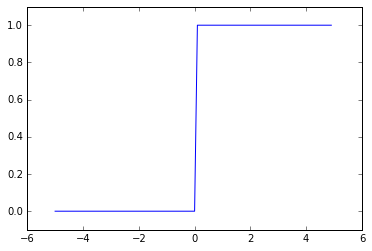

In [8]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y 축 범위 지정
plt.show()

###### 0을 경계로 0->1 or 1->0 으로 바뀜

## 시그모이드 함수 구현

In [9]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [11]:
x = np.array([-1.0,1.0, 2.0])
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

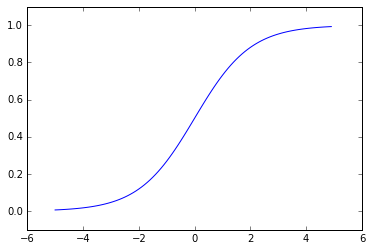

In [16]:
x_1 = np.arange(-5.0,5.0, 0.1)
y_1 = sigmoid(x_1)
plt.plot(x_1,y_1)
plt.ylim(-0.1,1.1)
plt.show()

## ReLU 함수 구현

In [18]:
# 0보다 작은 부분은 무조건 0 으로 나타냄
def relu(x):
    return np.maximum(0,x)

## 행렬의 내적

###### (2,3) * (3,2) = (2,2) 

In [19]:
A = np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [20]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [21]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

###### (3,2) * 2 = 3

In [22]:
A_1 = np.array([[1,2], [3,4], [5,6]])
A_1.shape

(3, 2)

In [23]:
B_1 = np.array([7,8])
B_1.shape

(2,)

In [24]:
np.dot(A_1, B_1)

array([23, 53, 83])

## 신경망 구현

In [38]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X,W1)+B1
Z1 = sigmoid(A1)

print(A1) # vector 값 형태로 출력
print(Z1) 

W2 = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
B2 = np.array([0.1,0.2])

print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1,W2)+B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(2, 3)
(2,)
(3,)
[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]
(3, 2)
(2,)
[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]


## 구현 정리

In [31]:
def identity_function(x) :
    return x

In [32]:
def init_network(): # 가중치와 편향 초기화
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5], [0.2,0.4, 0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network,x): # 입력 신호를 출력 신호로 변환하는 과정을 구현
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = identity_function(a3)
    
    return y

In [33]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network,x)
print(y)

[ 0.31682708  0.69627909]


## softmax 함수 구현

In [35]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [37]:
a3 = np.array([0.3,2.9,4.0])
y3 = softmax(a3)
print(y3)
np.sum(y3)

[ 0.01821127  0.24519181  0.73659691]


1.0

## 손 글씨 인식 - MNIST sample

In [42]:
from mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# loading data
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False) # 1차원 배열로 변환, 정규화는 안함

print(x_train.shape) # 60000,784
print(t_train.shape) # 60000
print(x_test.shape)  # 10000,784
print(t_test.shape)  # 10000

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28) # 1차원 이미지를 다시 원래 상태로 변환
print(img.shape)

img_show(img)

(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


## 손 글씨 인식 MNIST 함수 정의

In [43]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = softmax(a3) 
    
    return y

In [52]:
x_nn, t_nn = get_data() # data set get 
network_nn = init_network() # network 생성

# 배치 사이즈 
batch_size = 100

accuracy_cnt = 0
for i in range(0,len(x_nn), batch_size): # input 수 만큼 for loop
    x_batch = x_nn[i:i+batch_size]
    y_batch = predict(network_nn, x_batch)
    
    p = np.argmax(y_batch,axis=1) # 예측값 배열에서 가장 큰 원소의 index를 구함
    accuracy_cnt += np.sum(p==t_nn[i:i+batch_size])
    
        
print("Accuracy : "+str(float(accuracy_cnt) / len(x_nn))) # 정확도를 맞춘점수 / 데이터수로 나누어 정확도 표시

Accuracy : 0.9352
